In [1]:
import pandas as pd
import geopandas as gpd
import os
import pyarrow
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')   

In [9]:
pur2020_ag_data = pd.read_parquet("/srv/data/my_shared_data_folder/cpr/pur2020_ag.parquet", engine="fastparquet")
#ac_pur2020_ag_data = pd.read_parquet("/srv/data/my_shared_data_folder/cpr/another_copy_pur2020_ag.parquet", engine="fastparquet") 

In [10]:
pur2020_ag_data = pur2020_ag_data.sample(frac = 0.001)
#list(pur2020_ag_data.columns)
pur2020_ag_data

,use_no,prodno,chem_code,prodchem_pct,lbs_chm_used,lbs_prd_used,amt_prd_used,unit_of_meas,acre_planted,unit_planted,...,MTR,CO_MTRS,REGION,CO_MTR,County_CDn,NAMELSAD,geometry,site_name,COUNTYFP,county_name
3142050,2983562,65679,NaN,NaN,NaN,7.7276,1.04,GA,76.4,A,...,M11S13E,10M11S13E19,5.0,10M11S13E,10.0,Fresno County,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0c\x00...,ALMOND,19,Fresno
4410723,1985678,64088,3983.0,22.50,0.155205,0.6898,10.00,OZ,213.0,A,...,M22S10E,27M22S10E18,3.0,27M22S10E,27.0,Monterey County,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\t\x00\x...,SWISS CHARD,53,Monterey
5165645,548696,63959,NaN,NaN,NaN,2.5839,40.00,OZ,6.0,A,...,M27N03W,52M27N03W26,5.0,52M27N03W,52.0,Tehama County,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,WALNUT,103,Tehama
3790136,4136951,58796,NaN,NaN,NaN,15.9579,1.88,GA,20.0,A,...,M17S26E,54M17S26E25,5.0,54M17S26E,54.0,Tulare County,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,ORANGE,107,Tulare
4604792,4326120,68752,6064.0,94.46,0.135267,0.1432,2.00,OZ,23000.0,S,...,M02S03W,01M02S03W16,2.0,01M02S03W,1.0,Alameda County,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,CANNABIS (ALL OR UNSPECIFIED),1,Alameda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3303520,48980,45992,175.0,83.90,252.958500,301.5000,301.50,LB,45.0,A,...,M13S19E,10M13S19E19,5.0,10M13S19E,10.0,Fresno County,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...",ALMOND,19,Fresno
7138624,422400,34136,94011.0,0.70,0.001006,0.1437,2.00,OZ,67.0,A,...,M12S03E,27M12S03E29,3.0,27M12S03E,27.0,Monterey County,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...",N-OUTDR FLOWER,53,Monterey
5219519,3390798,58071,NaN,NaN,NaN,1.3597,0.16,GA,244.0,A,...,S09N35W,42S09N35W01,3.0,42S09N35W,42.0,Santa Barbara County,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,"LETTUCE, LEAF",83,Santa Barbara
4672720,1658676,71697,560.0,80.00,1.416000,1.7700,1.77,LB,3.5,A,...,M06N04W,28M06N04W30,2.0,28M06N04W,28.0,Napa County,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,"GRAPE, WINE",55,Napa


In [11]:
pur2020_ag_data['prodno'].apply(str)
distinct_pesticides = pur2020_ag_data.prodno.unique()
len(distinct_pesticides)

1209

In [12]:
#pest_type = pur2020_ag_data.groupby("prodno")["lbs_prd_used"].sum()
pest_type = pest_type.reset_index().rename(columns={'lbs_prd_used':'total_amt_used_(lbs)'})
pest_type

,index,prodno,total_amt_used_(lbs)
0,0,268,0.9913
1,1,270,17.1839
2,2,340,4.5815
3,3,373,4.0000
4,4,1774,60.0000
...,...,...,...
1218,1218,73379,415.8533
1219,1219,73445,7.5000
1220,1220,73535,2.9866
1221,1221,73547,74.3240


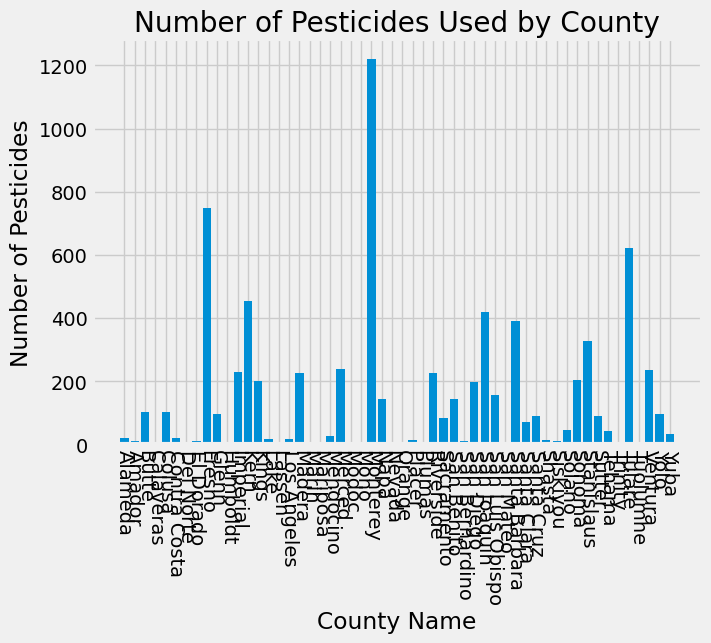

In [13]:
pest_use_county = pur2020_ag_data.groupby("county_name")["prodno"].count()
pest_use_county = pest_use_county.reset_index()
pest_use_county

plt.figure(figsize=(7,5)) 
plt.bar(x = pest_use_county['county_name'], height= pest_use_county['prodno'])
plt.xticks(rotation=270)                           # Rotate x-labels by 270 degrees
plt.xlabel('County Name')                      # x-label added
plt.ylabel('Number of Pesticides')          # y-label added
plt.title('Number of Pesticides Used by County')  # title added
plt.show()

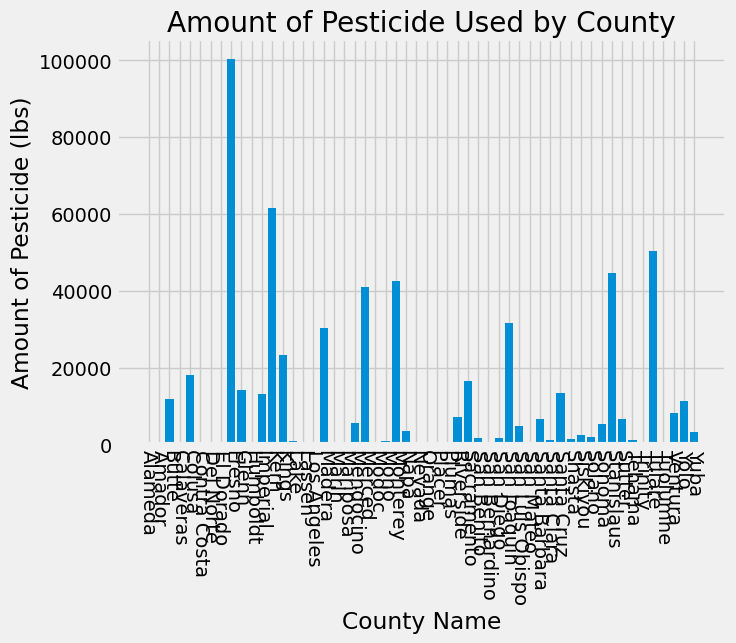

In [14]:
pest_amt_county = pur2020_ag_data.groupby("county_name")["lbs_prd_used"].sum()
pest_amt_county = pest_amt_county.reset_index()
pest_amt_county

plt.figure(figsize=(7,5)) 
plt.bar(x = pest_amt_county['county_name'], height= pest_amt_county['lbs_prd_used'])
plt.xticks(rotation=270)                           # Rotate x-labels by 270 degrees
plt.xlabel('County Name')                      # x-label added
plt.ylabel('Amount of Pesticide (lbs)')          # y-label added
plt.title('Amount of Pesticide Used by County')  # title added
plt.show()

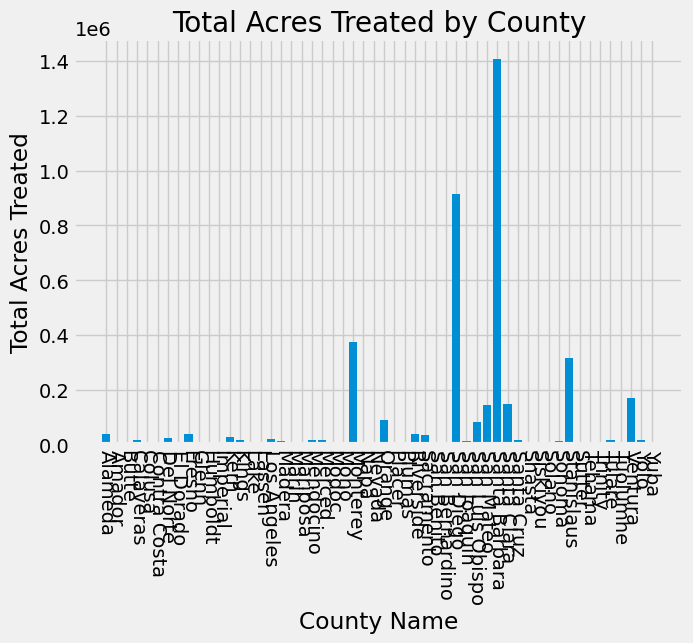

In [15]:
acre_treated_county = pur2020_ag_data.groupby("county_name")["acre_treated"].sum()
acre_treated_county = acre_treated_county.reset_index()
acre_treated_county

plt.figure(figsize=(7,5)) 
plt.bar(x = acre_treated_county['county_name'], height= acre_treated_county['acre_treated'])
plt.xticks(rotation=270)                           # Rotate x-labels by 270 degrees
plt.xlabel('County Name')                      # x-label added
plt.ylabel('Total Acres Treated')          # y-label added
plt.title('Total Acres Treated by County')  # title added
plt.show()

In [ ]:
ac_pur2020_ag_data = ac_pur2020_ag_data.sample(frac = 0.001)
#list(nonag_pur2020_ag_data.columns)
ac_pur2020_ag_data